<a href="https://colab.research.google.com/github/andreaafs100766/Sprint-I/blob/master/Sprint01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Ciência de Dados - Previsão de Vendas
Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

Passo a Passo de um Projeto de Ciência de Dados



*   Passo 1: Entendimento do Desafio
*   Passo 2: Entendimento da Área/Empresa
*   Passo 3: Extração/Obtenção de Dados
*   Passo 4: Ajuste de Dados (Tratamento/Limpeza)
*   Passo 5: Análise Exploratória
*   Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
*   Passo 7: Interpretação de Resultados




Projeto Ciência de Dados - Previsão de Vendas

*   Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
*   TV, Jornal e Rádio estão em milhares de reais
*   Vendas estão em milhões 



Importar a Base de dados

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importação de pacotes
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
 


In [ ]:
# Informa a URL de importação do dataset

# Lê o arquivo 
df = pd.read_csv("https://raw.githubusercontent.com/andreaafs100766/Sprint-I/master/anuncio.csv")
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Mostra as dimensões do dataset
df.shape

(200, 4)

In [ ]:
# Mostra as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Mostra as 10 primeiras linhas do dataset
df.head(10)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
# Mostra as 10 últimas linhas do dataset
df.tail(10)


,TV,Radio,Jornal,Vendas
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


## Análise Exploratória



### Informações Gerais e Estatísticas Descritivas

In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
df.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Verifica a distribuição das classes
df.groupby('Vendas').size()


Vendas
1.6     1
3.2     1
4.8     1
5.3     2
5.5     1
       ..
24.7    1
25.4    3
25.5    1
26.2    1
27.0    1
Length: 121, dtype: int64

In [ ]:
# Correlação de Pearson
df.corr(method = 'pearson')

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


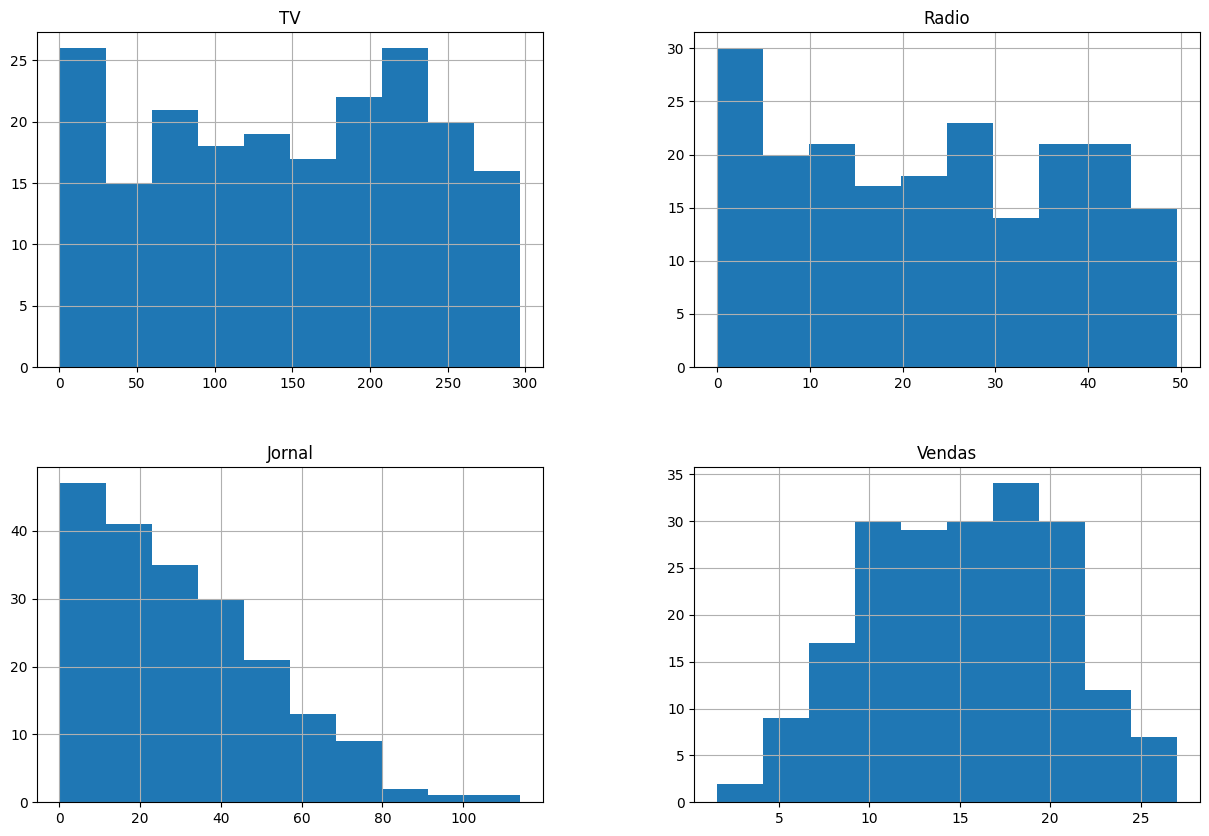

In [ ]:
# Histograma
df.hist(figsize = (15,10))
plt.show()

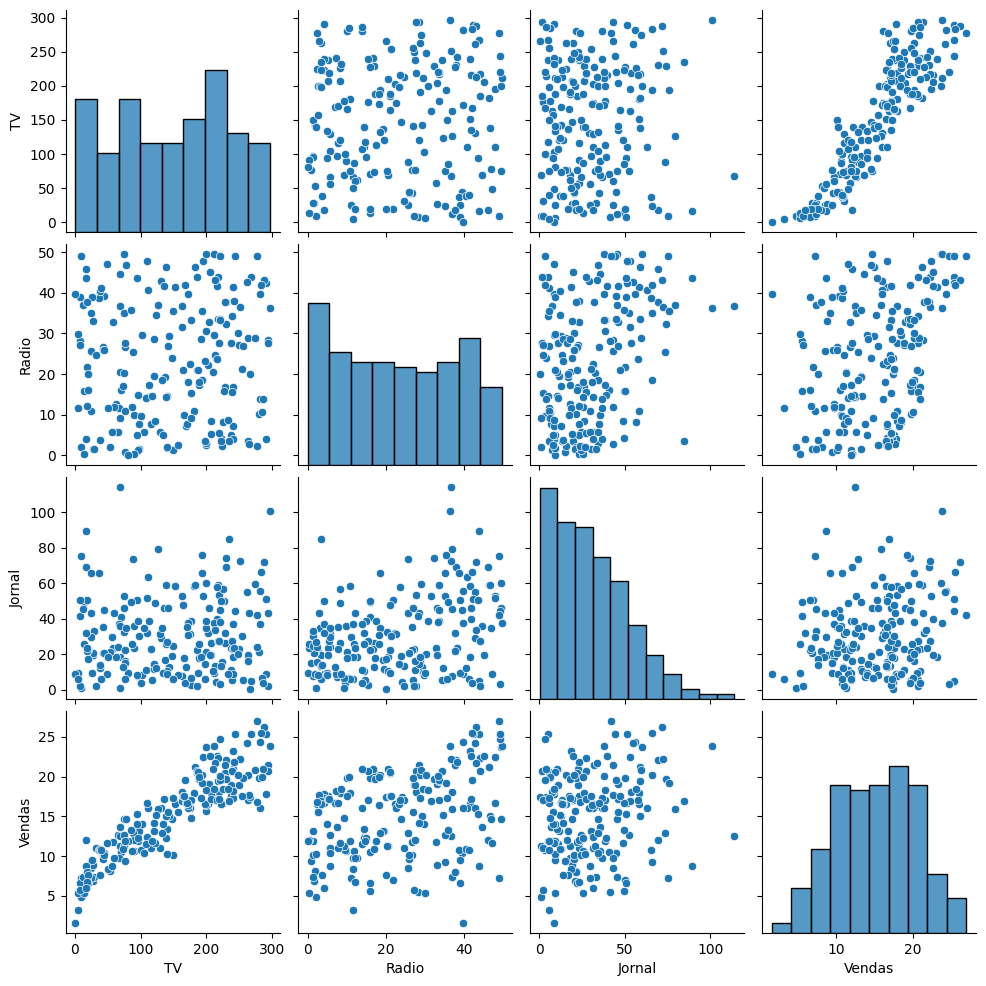

In [ ]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
  
 
sns.pairplot(df)
plt.show()

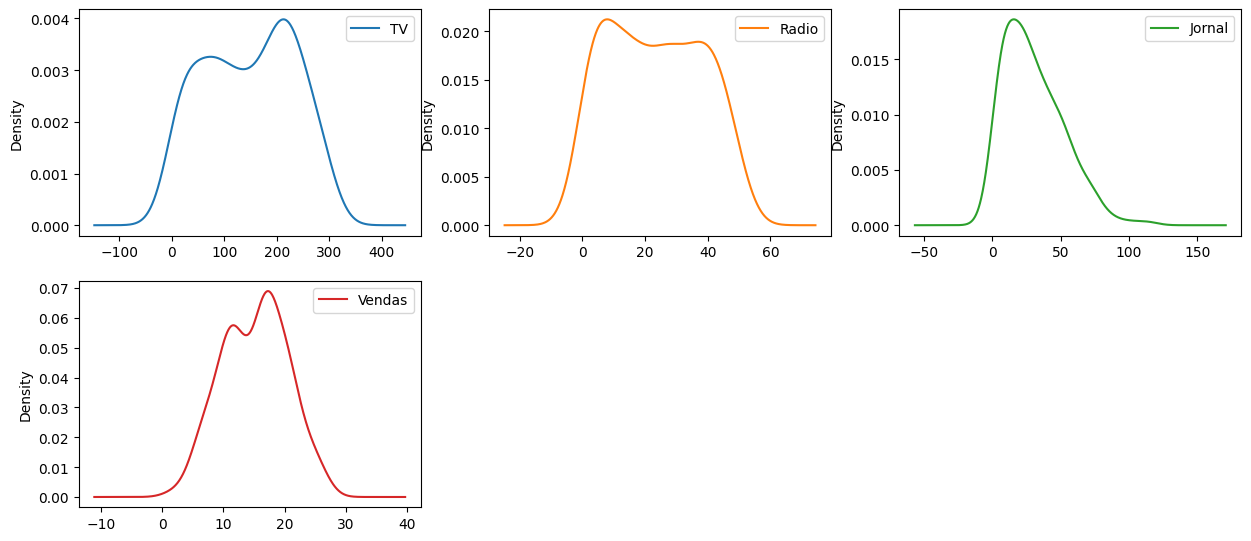

In [ ]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

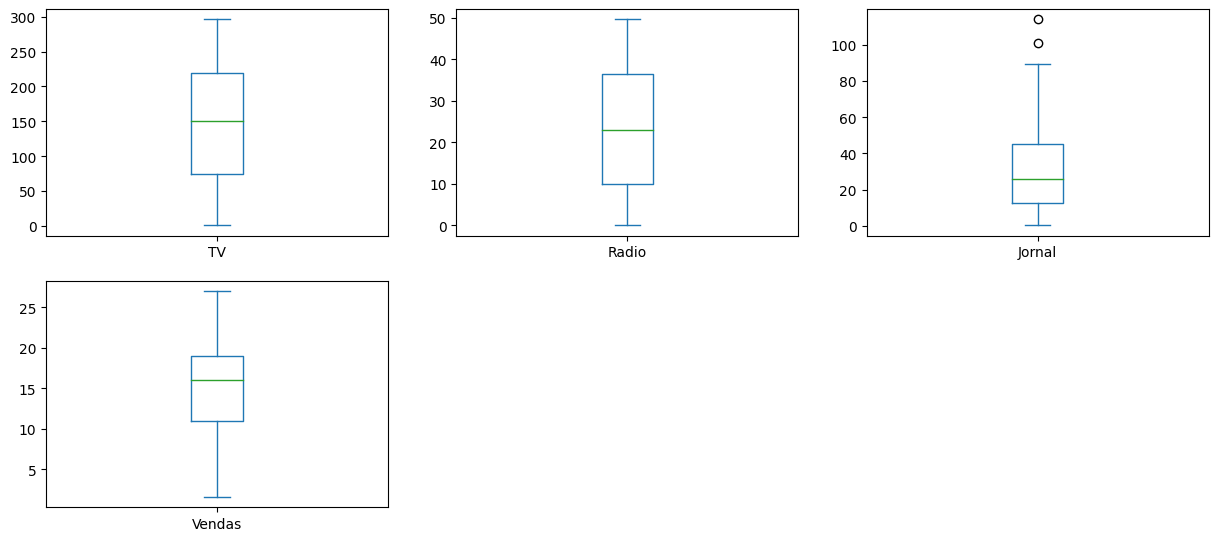

In [ ]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens


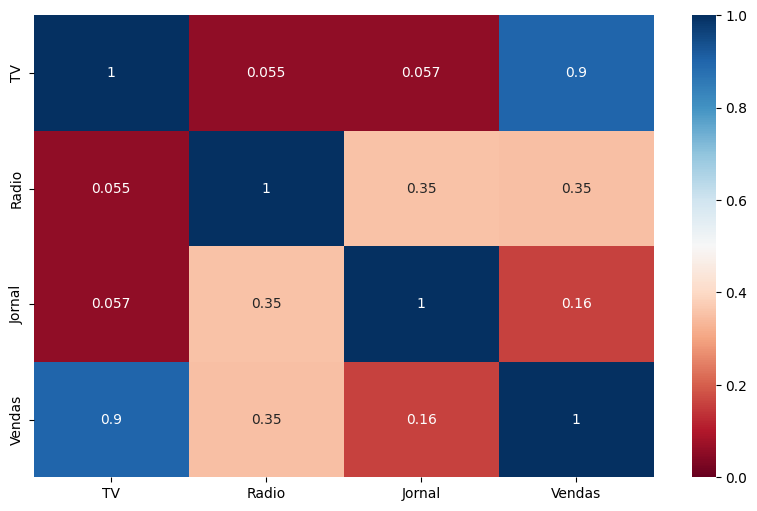

In [ ]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=0, vmax=1);


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste


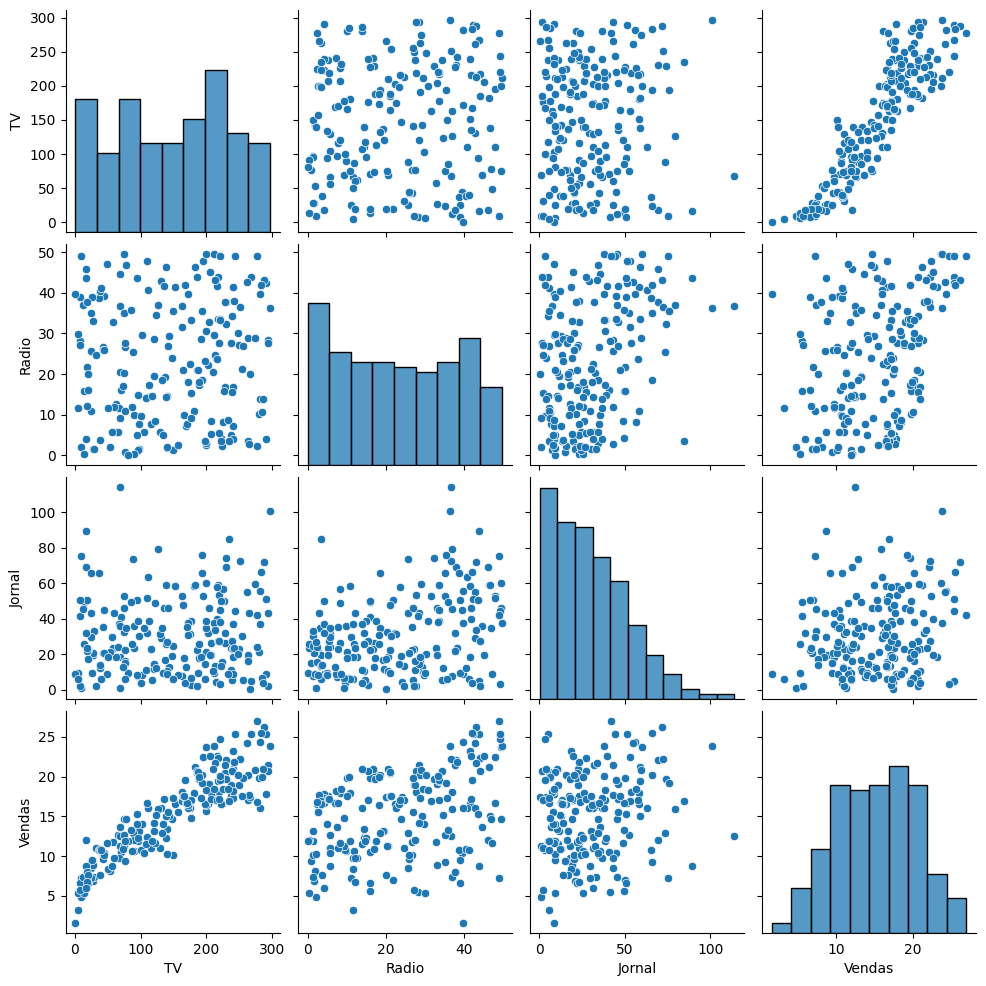

In [ ]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(df)
plt.show()

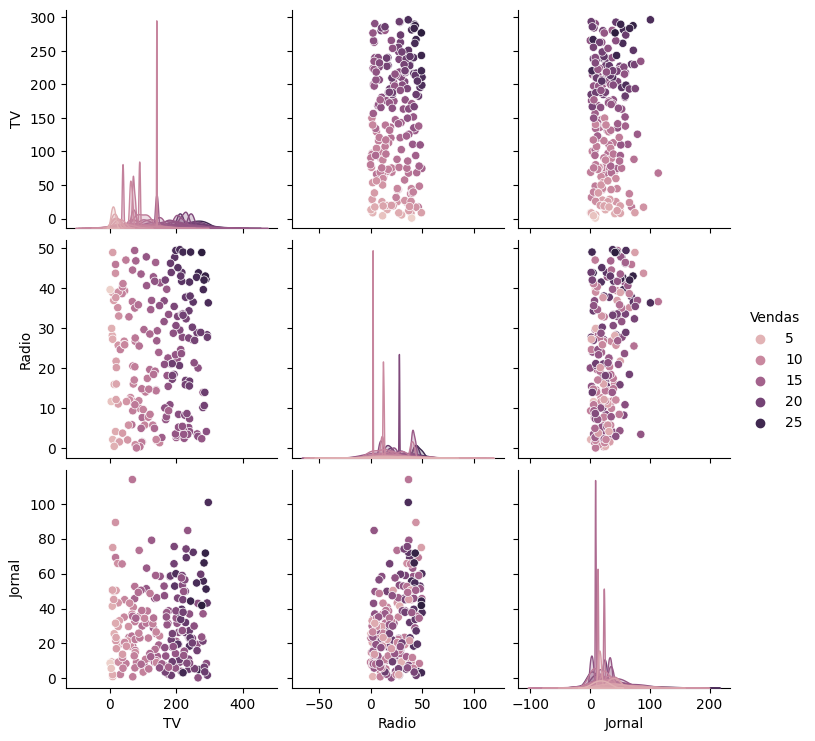

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(df, hue = "Vendas", height = 2.5)

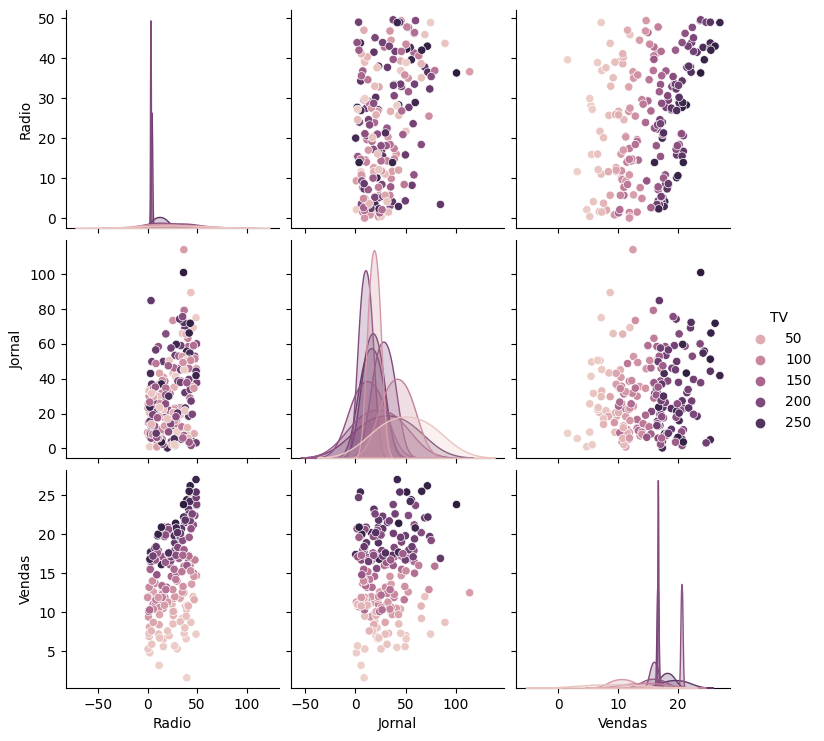

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(df, hue = "TV", height = 2.5);

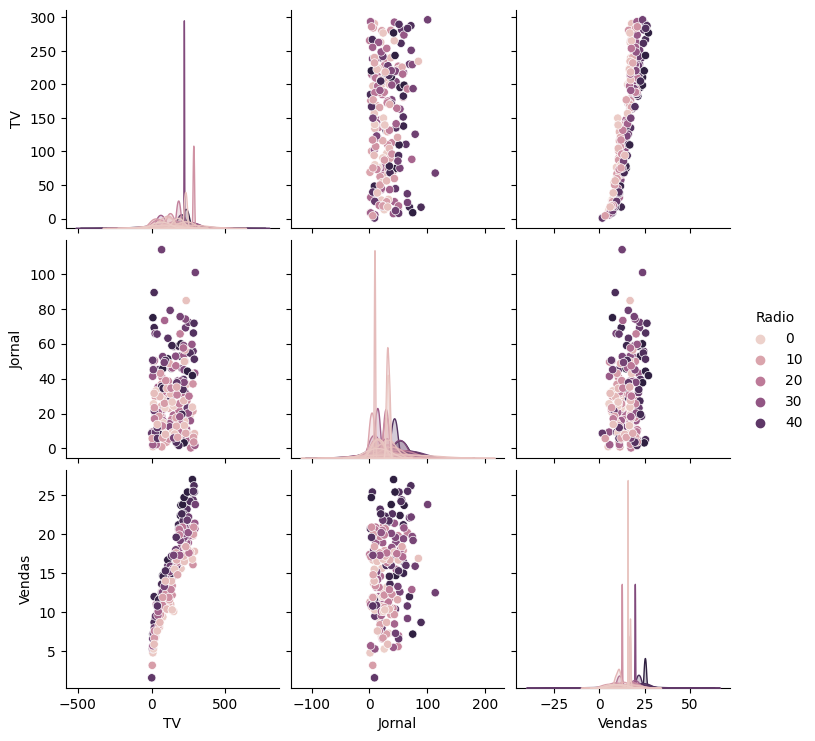

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(df, hue = "Radio", height = 2.5);

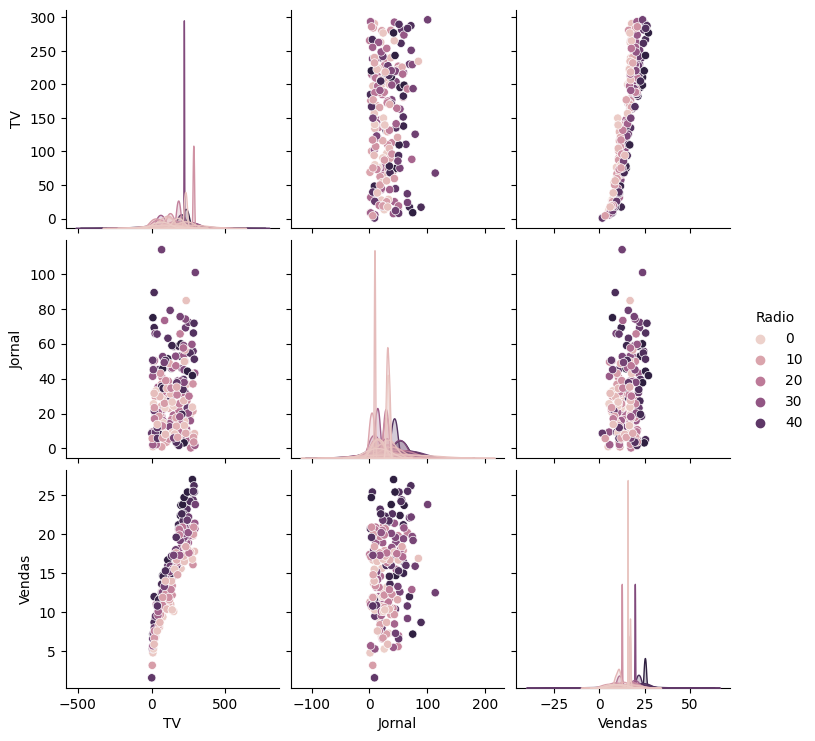

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(df, hue = "Radio", height = 2.5);

##Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning
### Separando em dados de treino e dados de teste

In [ ]:
from sklearn.model_selection import train_test_split 
y = df["Vendas"]
x = df.drop("Vendas", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

*  Regressão Linear
*  RandomForest (Árvore de Decisão) 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria as inteligencias aritificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treina as inteligencias artificias
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [ ]:
# Teste da AI e Avaliação do Melhor Modelo
# Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
from sklearn import metrics

# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273
0.9633093562951478


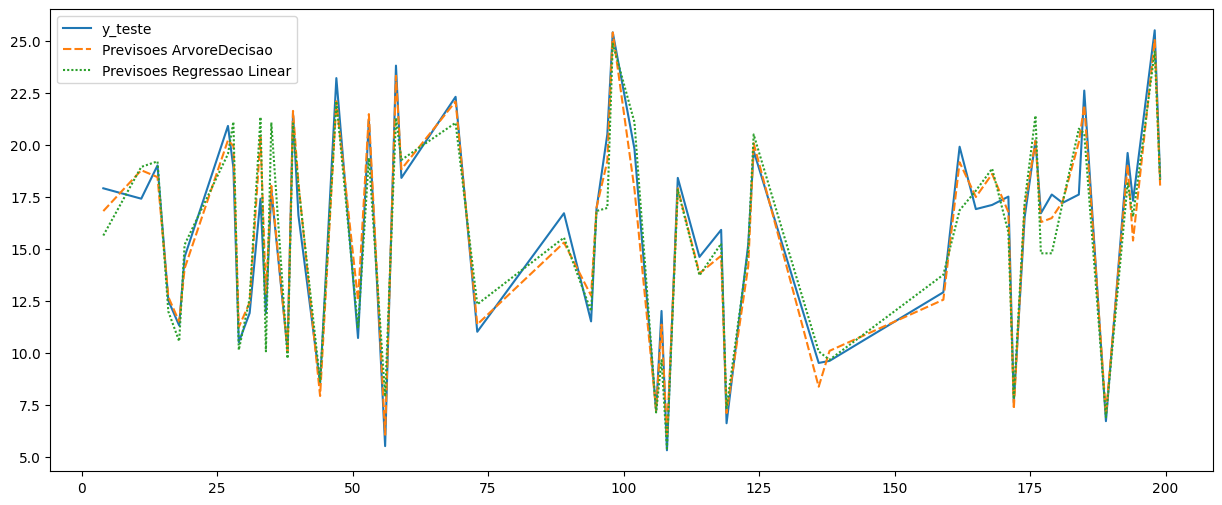

In [ ]:
# Visualização Gráfica das Previsões

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()


In [ ]:
# Como fazer uma nova previsao
# importar a nova_tabela com o pandas (a nova tabela tem que ter os dados de TV, Radio e Jornal)
# previsao = modelo_randomforest.predict(nova_tabela)
# print(previsao)

nova_tabela = pd.read_csv("https://raw.githubusercontent.com/andreaafs100766/Sprint-I/master/novos.csv")
display(nova_tabela)


,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [ ]:
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

[ 7.614  8.595 19.584]


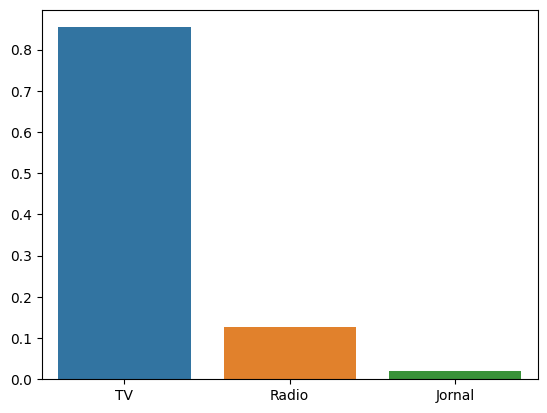

Radio     4652.8
Jornal    6110.8
dtype: float64
----------------
TV        29408.5
Jornal     6110.8
dtype: float64
----------------
TV       29408.5
Radio     4652.8
dtype: float64


In [ ]:
# Qual a importância de cada variável para as vendas?

sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

# Caso queira comparar Radio com Jornal
print(df[["Radio", "Jornal"]].sum())
print('----------------')
print(df[["TV", "Jornal"]].sum())
print('----------------')
print(df[["TV", "Radio"]].sum())

In [ ]:
# Instalando o pandas profiling (executar apenas na 1a vez, depois comente esta linha)
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.6/22.6 MB 31.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 94.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=d0765641623d2e3aa1ac07ec0873837495289b9d78767b8c407c0c9c381a12f

In [ ]:
# imports necessários
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

# geração do report
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':False}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]